In [98]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks
import sys

In [99]:
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('/Users/Ewa 1/Dropbox/Sheet1.csv', delimiter=',',dtype=float)
#print(exp_spec)

[[ 3.99212300e+02  8.36399495e-02]
 [ 4.00176600e+02  2.58413040e-02]
 [ 4.01140900e+02  2.04967984e-02]
 [ 4.02105200e+02  1.94078328e-02]
 [ 4.03069500e+02  2.16312973e-02]
 [ 4.04033800e+02  1.58957817e-02]
 [ 4.04998000e+02  2.03362001e-02]
 [ 4.05962300e+02  2.22980745e-02]
 [ 4.06926600e+02  1.83593789e-02]
 [ 4.07890900e+02  1.08669733e-02]
 [ 4.08855200e+02  9.47114777e-03]
 [ 4.09819400e+02  6.89226613e-03]
 [ 4.10783700e+02  1.21894306e-02]
 [ 4.11748000e+02  8.09065499e-03]
 [ 4.12712300e+02  5.97861942e-03]
 [ 4.13676500e+02  9.39196777e-03]
 [ 4.14640800e+02  1.16528022e-02]
 [ 4.15605100e+02  6.98648663e-03]
 [ 4.16569400e+02  1.10438311e-02]
 [ 4.17533700e+02  2.25888355e-02]
 [ 4.18498000e+02  3.20962299e-02]
 [ 4.19462200e+02  3.32856183e-02]
 [ 4.20426500e+02  1.91213827e-02]
 [ 4.21390800e+02  1.20208171e-02]
 [ 4.22355100e+02  1.91811116e-02]
 [ 4.23319400e+02  2.12604160e-02]
 [ 4.24283700e+02  1.79649704e-02]
 [ 4.25247900e+02  1.89919288e-02]
 [ 4.26212200e+02  1

In [100]:
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
H=0.02
T=0.0
D=8
#experimental resolution
res=8.0

In [101]:
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]
h_exp=[heights[j] for j in peaks]

In [102]:
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))


Peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[555.4258, 615.2113, 738.6393, 806.1389, 851.4601, 933.424, 978.7452, 986.4595, 1061.673, 1133.995, 1182.208, 1192.816, 1274.78, 1303.708, 1336.494, 1365.422, 1443.529, 1594.921, 1653.742, 2925.629]
20 peaks fulfilling the criteria in experimental spectrum


In [103]:
theo_spec=genfromtxt('68 closed PBE0D3 poszerzone 4cm-1.txt', delimiter='     ',dtype=float)
#print(*theo_spec, sep='\n')

In [110]:
#scaling factor for given functional
SF=0.989
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
wavenumbers_theo=SF*theo_spec[:,0]
heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
ht_array=np.array(heights_theo)
np.set_printoptions(precision=8,threshold=sys.maxsize)
#print(max(ht_array))
#print(max(theo_spec[:,1]))
#H=0.03
D=8
peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
#print(heights_theo)
y_theo=[wavenumbers_theo[j] for j in peaks_theo]
print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y_theo)
h_theo=[heights_theo[j] for j in peaks_theo]
#print(h_theo)
no_of_peaks=len(y_theo)


Theoretical peaks detected of min. height of 0.03, vertical threshold 0.0 and 8-point distance between neighbors are: 
[326.37, 541.972, 558.785, 616.147, 703.179, 785.266, 800.101, 865.375, 888.122, 902.957, 931.638, 944.495, 957.352, 967.242, 1015.703, 1052.296, 1063.175, 1092.845, 1108.669, 1130.427, 1191.745, 1216.47, 1230.316, 1254.052, 1268.887, 1280.7549999999999, 1289.656, 1311.414, 1328.227, 1372.732, 1385.589, 1398.446, 1432.072, 1453.83, 1471.632, 1514.1589999999999, 1575.477, 1590.312, 1649.652, 1671.41, 1699.102, 3027.329, 3123.262, 3167.767, 3197.437, 3213.261]


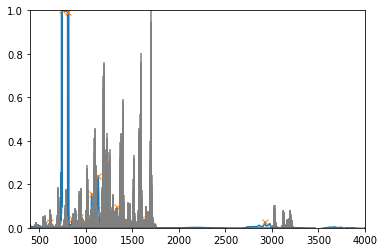

In [111]:
plt.plot(wavenumbers,heights)
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
plt.stem(wavenumbers_theo, heights_theo,markerfmt=' ',linefmt='grey')
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.show()

In [106]:
#Select theoretical peaks for comparison
#first=np.array([res+1.0])

#resolution_table=np.concatenate([first,np.ediff1d(wavenumbers_theo)])

#selected_theo_idx = np.where(np.logical_and(heights_theo > 2.0*H, wavenumbers_theo > 350,resolution_table>res))[0]
#print("{} peaks fulfilling the criteria in theoretical spectrum".format(len(selected_theo_idx)))

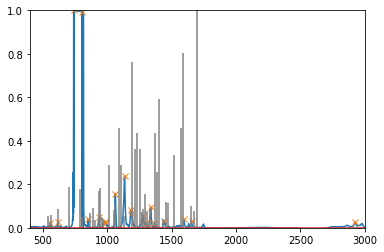

In [112]:
plt.plot(wavenumbers,heights)
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=3000)
plt.show()

In [113]:
#Calculate errors
print("Error calculation:")

#tolerance
tol=30.0

error=[]
j=0
#print(range(len(y)))
#print(range(len(y_theo)))
assigned=[]
assigned_theo_number=[]
assigned_exp_number=[]
for i in range(len(y)):
        print(i)
        while True:
            if y[i]-y_theo[j]>tol :
                print((y[i]-y_theo[j],y[i],y_theo[j]))
                print('error > ',tol,', skipping the predicted peak')
                j=j+1
                print(heights[i])
                print(heights_theo[j])
            else:
                if y[i]>500 and y_theo[j]>500:
                    if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                        error.append(y[i]-y_theo[j])
                        assigned.append([y[i],y_theo[j]])
                        assigned_theo_number.append(j)
                        assigned_exp_number.append(i)                     
                        print(heights[i])
                        print(heights_theo[j])
                    else:
                        j=j+1
#                        error.append(y[i]-y_theo[j])
#                        assigned.append([y[i],y_theo[j]])
#                print((y[i]-y_theo[j],y[i],y_theo[j]))
#                print(i,j)
                j=j+1
                break
            if j==len(y_theo):
                print("End of theoretical spectrum")
                break
print(assigned_theo_number)
print(assigned_exp_number)
#print(heights)
#print(heights_theo)
print("\n {} peaks were assigned.\n".format(len(error)))
print("   |Exp. waveno. | Scaled theor. waveno. |  Theor. unscaled waveno | cm-1|   Exp. peak height (normalized) | Theor. peak height (normalized)")
k=0
for i in assigned:
    w=assigned_exp_number[k]
    v=assigned_theo_number[k]
    print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |    |",h_exp[w],"         | ",h_theo[v])
    k=k+1

print("\n Mean absolute error: \n")
MAE=   sum(abs(i) for i in error)/len(peaks)
print("MAE = {} cm-1".format(round(MAE,2)))

#reverse order matching
print("\n NOW RIGHT TO LEFT \n")


error=[]

j=len(y_theo)
for i in reversed(range(len(y))):      
            while True:
                if y[i]-y_theo[j]<-50.0 :
 #           print('error > 50, skipping the predicted peak')
#            print(i,j,wavenumbers[i])
                    j=j-1
                else:
                    if y[i]>500 and y_theo[j]>500:
                        error.append(y[i]-y_theo[j])        
                    print((y[i]-y_theo[j],y[i],y_theo[j]))
                    print(i,j-1)
                    j=j-1
                    break
MAE=   sum(abs(i) for i in error)/len(peaks)
print("MAE={}".format(MAE))
    

Error calculation:
0
(229.05579999999998, 555.4258, 326.37)
error >  30.0 , skipping the predicted peak
0.013830433048406766
0.0
1
0.004273034913056926
0.0
2
(35.460300000000075, 738.6393, 703.179)
error >  30.0 , skipping the predicted peak
0.0033892846613120865
0.0
0.0033892846613120865
0.0
3
0.0032092168169920083
0.0
4
0.003576881743795232
0.0
5
(45.30200000000002, 933.424, 888.122)
error >  30.0 , skipping the predicted peak
0.0026284753360449886
0.0
(30.466999999999985, 933.424, 902.957)
error >  30.0 , skipping the predicted peak
0.0026284753360449886
0.0
0.0026284753360449886
0.0
6
(34.25019999999995, 978.7452, 944.495)
error >  30.0 , skipping the predicted peak
0.003362728633846836
0.0
7
0.0036871378795947183
0.0
8
9
(41.149999999999864, 1133.995, 1092.845)
error >  30.0 , skipping the predicted peak
0.0017969277604684979
0.0
10
0.0015661185334937273
0.0
11
0.0011396829592753897
0.0
12
(44.46399999999994, 1274.78, 1230.316)
error >  30.0 , skipping the predicted peak
0.0020156

IndexError: list index out of range